<a href="https://colab.research.google.com/github/Explotion80/deeplearning/blob/master/neuron_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sieć neuronowa - gęsta

# Import bibliotek

In [0]:
 import keras
 from keras.datasets import mnist
 from keras.models import Sequential
 from keras.layers import Dense
 from keras.optimizers import RMSprop

Using TensorFlow backend.


# Dane

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape

(60000, 28, 28)

# Eksploracja danych

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych:', X_train.shape[0])
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:', X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

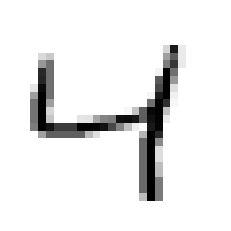

In [0]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2], cmap='Greys')
plt.axis('off')

### Wyświetlanie kilku obiektów

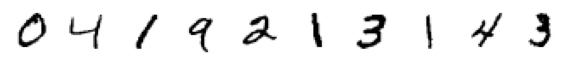

In [0]:
plt.figure(figsize=(10, 10))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap='Greys')
plt.show()

### Etykiety

In [0]:
X_train.dtype

dtype('uint8')

### Przygotowanie danych

In [0]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype('float32')
X_test - X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [0]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Budowa modelu

In [0]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Trenowanie modelu

In [0]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.1724 - val_accuracy: 0.9832
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.1913 - val_accuracy: 0.9821
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.1957 - val_accuracy: 0.9829
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.1906 - val_accuracy: 0.9838
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.1947 - val_accuracy: 0.9820
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.2012 - val_accuracy: 0.9826
Epoch 7/20
60000/60000 [==============================] - 7s 1

In [0]:
model.evaluate(X_test, y_test)

In [0]:
history.history

{'accuracy': [0.93198335,
  0.97471666,
  0.9834667,
  0.98826665,
  0.9906333,
  0.9923667,
  0.9941,
  0.9953333,
  0.9954,
  0.9964333,
  0.9971833,
  0.9974,
  0.99765,
  0.9978833,
  0.9982167,
  0.99813336,
  0.9986,
  0.99833333,
  0.99825,
  0.9984667],
 'loss': [0.2214099719941616,
  0.08098891456325849,
  0.05432107031146685,
  0.03766265066762765,
  0.029925138301278156,
  0.023640153081404665,
  0.01822357653454722,
  0.01492385336208002,
  0.014819107374234591,
  0.01153084716271648,
  0.009721803140459815,
  0.009326899943356209,
  0.008458005526286918,
  0.007202602147031151,
  0.006878639816154888,
  0.007798384686956767,
  0.004796156685370715,
  0.006064756748405792,
  0.006017375983610213,
  0.005900711989230221],
 'val_accuracy': [0.9688000082969666,
  0.9771000146865845,
  0.9767000079154968,
  0.9789000153541565,
  0.9811999797821045,
  0.9812999963760376,
  0.9786999821662903,
  0.9803000092506409,
  0.9818999767303467,
  0.9817000031471252,
  0.9829999804496765,

In [0]:
def make_accuracy_plot(history):
  """
  Funkcja zwraca wykres straty modelu
  """

  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  acc, val_acc = history.history['acc'], history.history['val_acc']
  epochs = range(1, len(acc) +1)

  plt.figure(figsize=(10, 8))
  plt.plot(epochs, acc, label='Dokładność trenowanie', marker='o')
  plt.plot(epochs, val_acc, label="Dokładność walidacji", marker='o')
  plt.legend()
  plt.title('Dokładność trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Dokładność')
  plt.show()

def make_loss_plot(history):
  """
  Funkcja zwraca wykres straty modelu
  """

  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  loss, val_loss = history.history['loss'], history.history['val_loss']
  epochs = range(1, len(loss) +1)

  plt.figure(figsize=(10, 8))
  plt.plot(epochs, loss, label='Dokładność trenowanie', marker='o')
  plt.plot(epochs, val_loss, label="Dokładność walidacji", marker='o')
  plt.legend()
  plt.title('Dokładność trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Dokładność')
  plt.show()

In [0]:
make_accuracy_plot(history)

KeyError: ignored

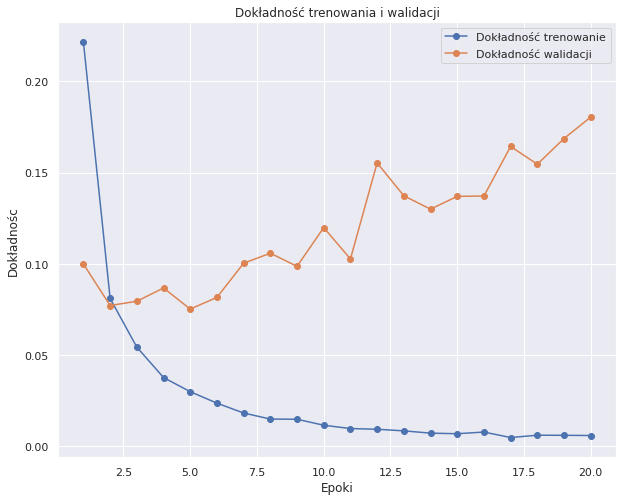

In [0]:
make_loss_plot(history)